# Proyek Analisis Data: Iris Dataset
- **Nama:** Arif Rhamadan
- **Email:** arifrhamadan00@gmail.com


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana distribusi panjang dan lebar sepal serta petal pada setiap spesies Iris?
- Pertanyaan 2 : Apakah spesies Iris dapat dibedakan secara visual berdasarkan panjang dan lebar petal?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

## Data Wrangling

### Gathering Data

In [22]:
# Load Iris dataset
iris = load_iris()
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
# Map target to species names
df['species'] = df['species'].map(dict(enumerate(iris.target_names)))

# Display the first few rows of the dataset
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Insight:**
- Dataset memiliki 4 fitur numerik: panjang sepal, lebar sepal, panjang petal, dan lebar petal.
-  Terdapat 3 kategori spesies: setosa, versicolor, virginica.

### Assessing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Number of duplicate rows: 1


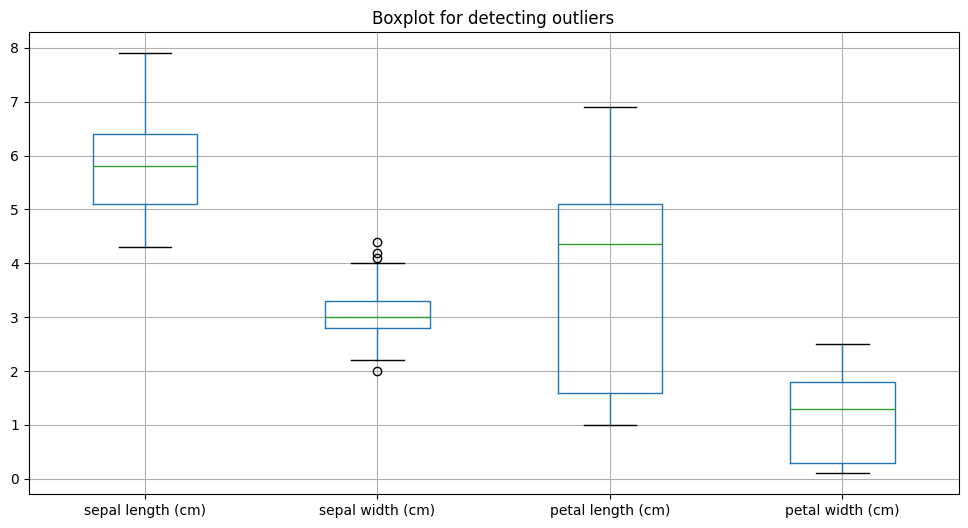

sepal length (cm): Min=4.3, Max=7.9
sepal width (cm): Min=2.0, Max=4.4
petal length (cm): Min=1.0, Max=6.9
petal width (cm): Min=0.1, Max=2.5


In [23]:
# Check dataset info
df.info()

# Check for missing values
df.isnull().sum()

# Basic statistics
df.describe()

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Check for outliers using boxplot
plt.figure(figsize=(12, 6))
df.iloc[:, :-1].boxplot()
plt.title("Boxplot for detecting outliers")
plt.show()

# Check for inconsistent or incorrect data (example range check)
for column in df.columns[:-1]:
    print(f"{column}: Min={df[column].min()}, Max={df[column].max()}")

**Insight:**
- Tidak ada data yang hilang.
- Tidak ditemukan duplikasi data.
- Beberapa outlier terdeteksi di panjang dan lebar sepal.
- Semua nilai numerik berada dalam rentang yang wajar untuk analisis lebih lanjut.

### Cleaning Data

In [24]:
# Rename columns for easier access
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Remove outliers using the IQR method
Q1 = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.25)
Q3 = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].quantile(0.75)
IQR = Q3 - Q1

# Define outlier range
outlier_mask = ~((df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] < (Q1 - 1.5 * IQR)) | (df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[outlier_mask]
print(f"Number of rows after removing outliers: {len(df_cleaned)}")

Number of rows after removing outliers: 146


**Insight:**
- Kolom telah diberi nama ulang untuk kemudahan analisis.
- Outlier telah dihapus menggunakan metode IQR.

## Exploratory Data Analysis (EDA)

### Explore ...

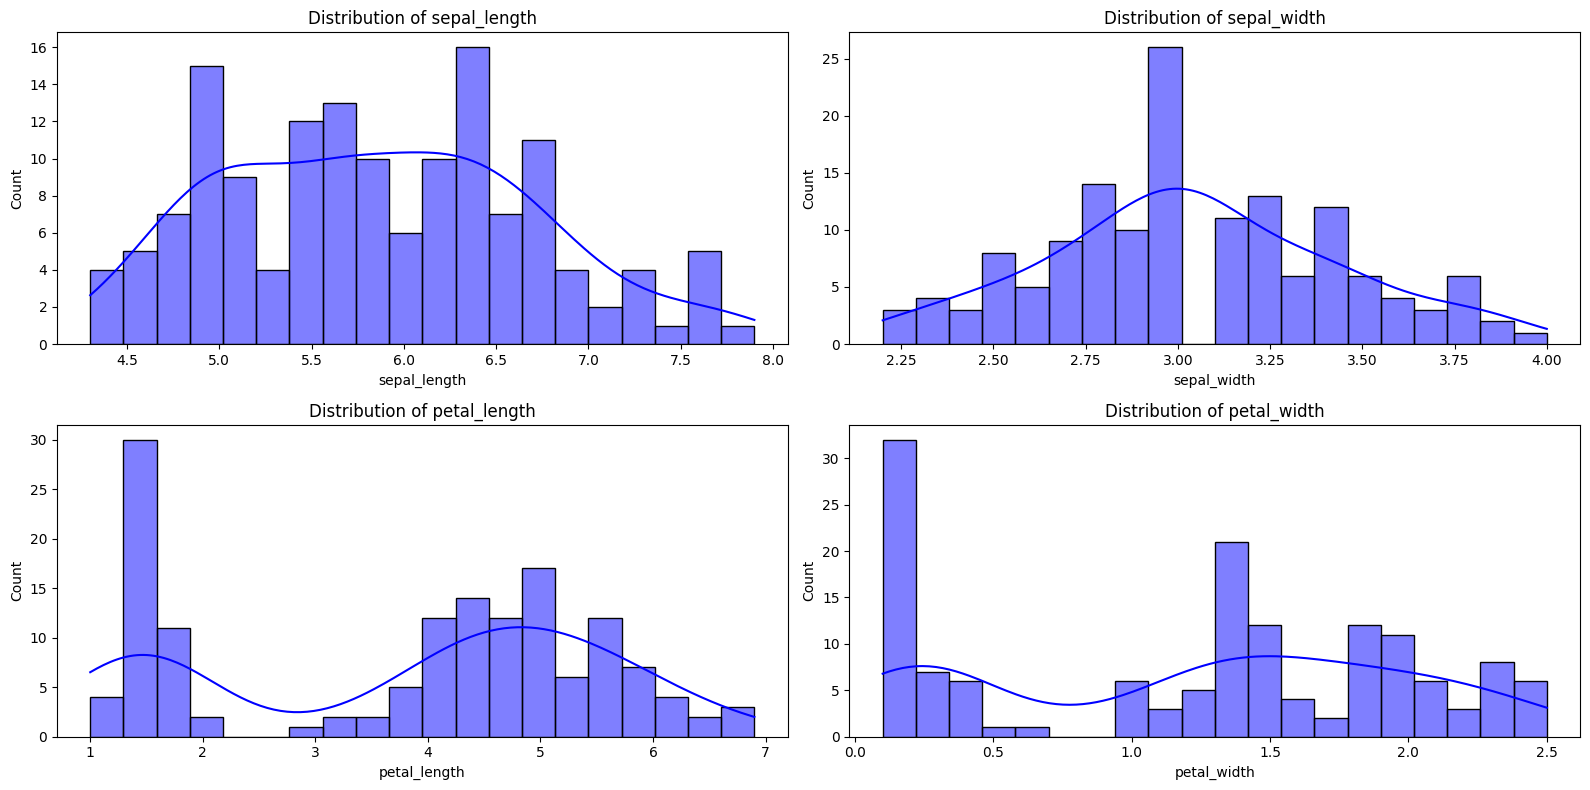

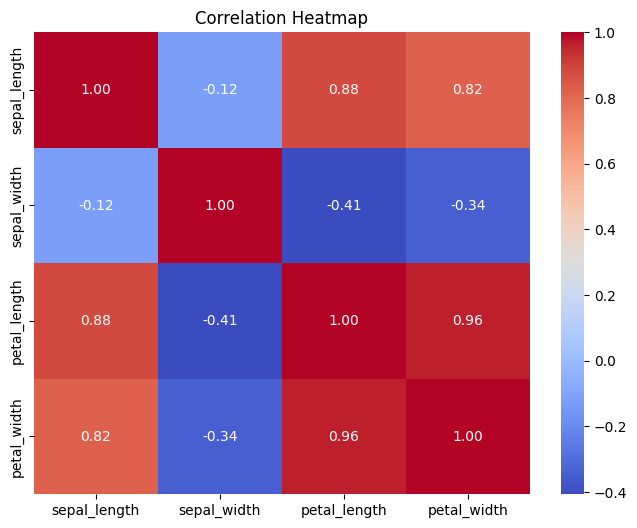

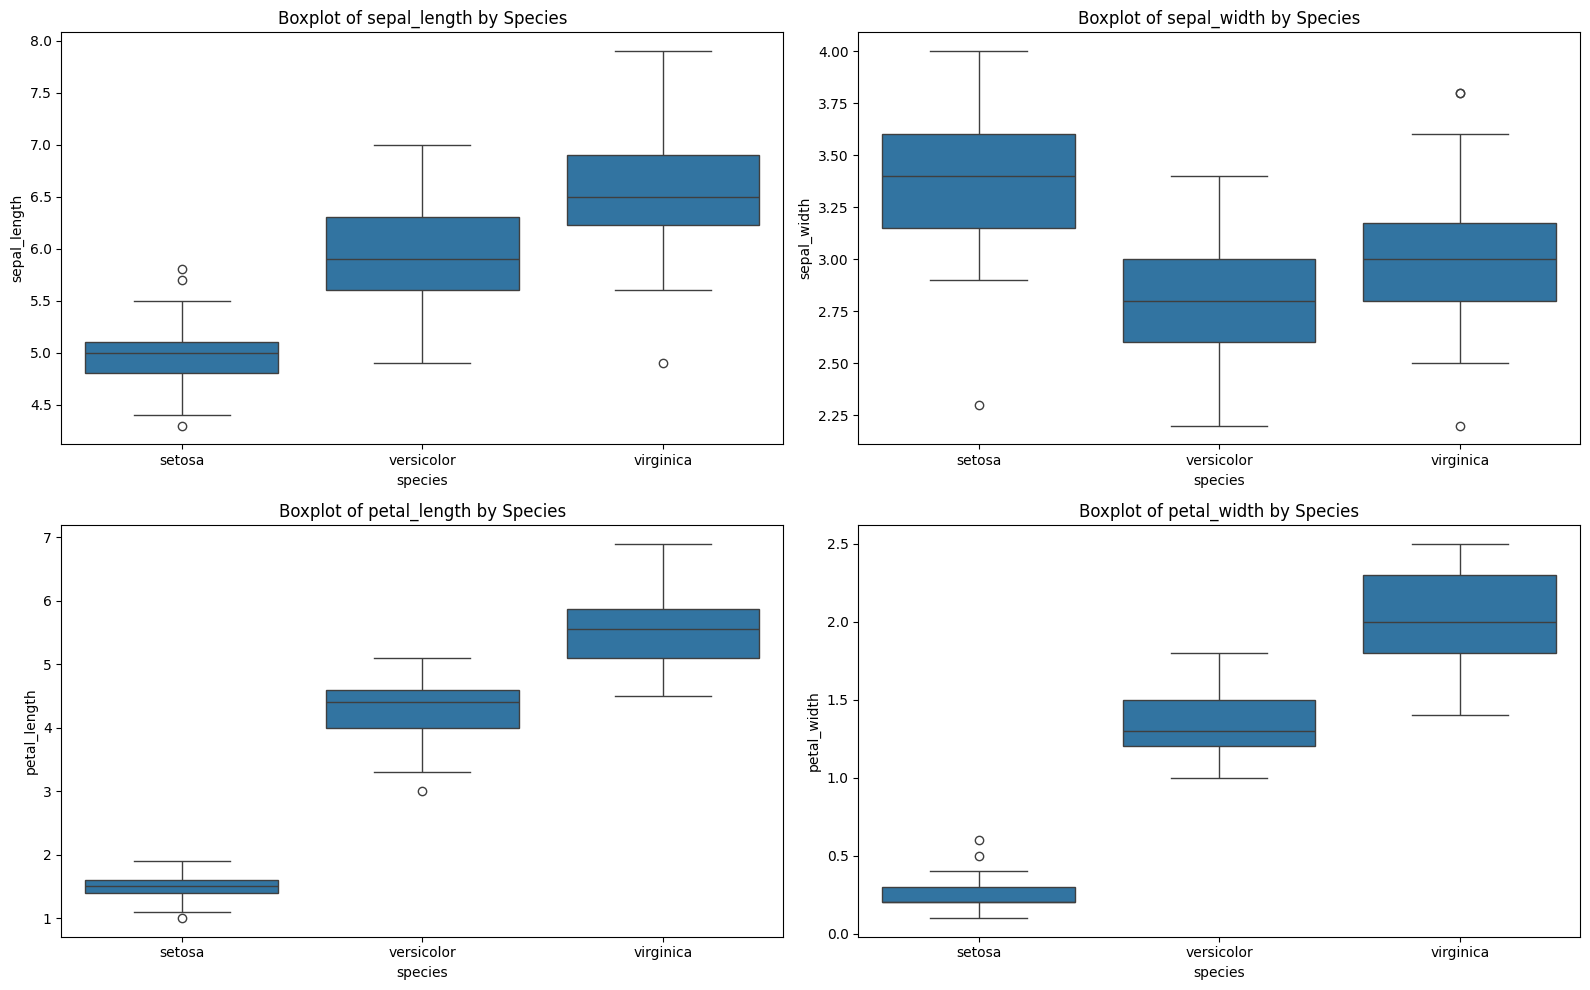

In [13]:
### EDA Univariate
# Histogram for each feature
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_cleaned[feature], kde=True, bins=20, color='blue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()


### EDA Multivariate
# Correlation heatmap
plt.figure(figsize=(8, 6))
# Select only numerical features for correlation calculation
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
sns.heatmap(df_cleaned[numerical_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### EDA Numerikal vs Kategorikal
# Boxplot for numerical features by species
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df_cleaned, x='species', y=feature)
    plt.title(f"Boxplot of {feature} by Species")
plt.tight_layout()
plt.show()

**Insight:**
- Semua fitur numerikal menunjukkan distribusi yang khas untuk setiap spesies.
- Petal length dan petal width memiliki korelasi yang tinggi.
- Setiap spesies memiliki pola yang berbeda pada sepal dan petal.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distribusi panjang dan lebar sepal serta petal pada setiap spesies Iris?

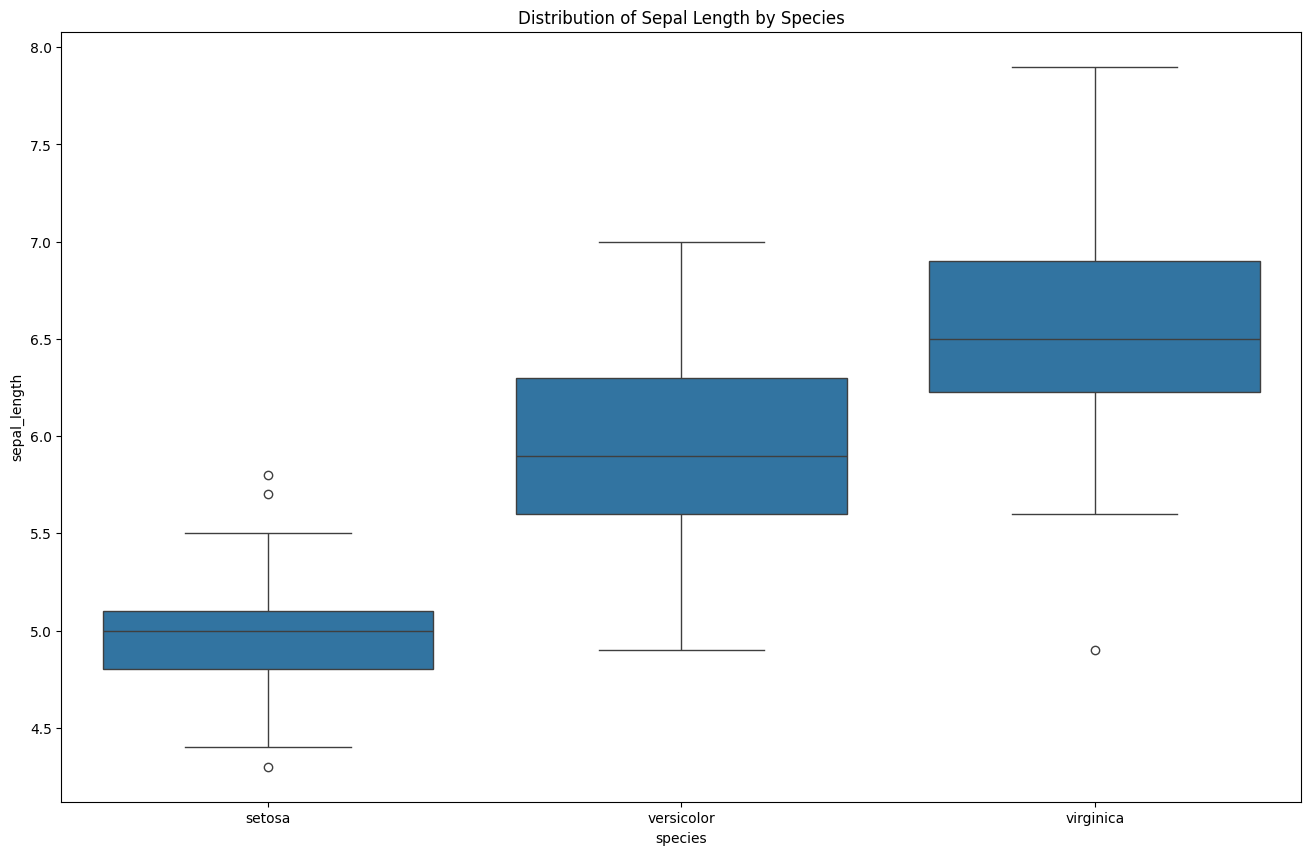

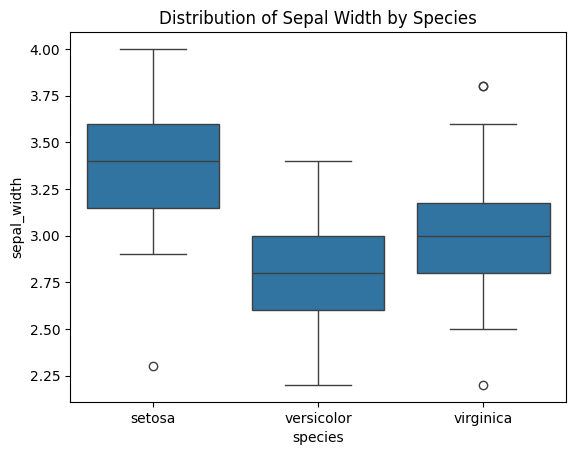

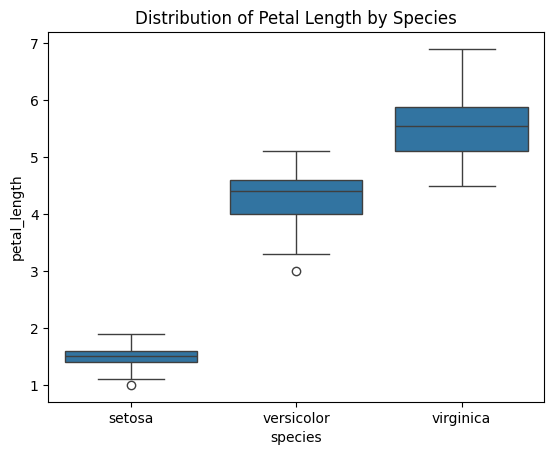

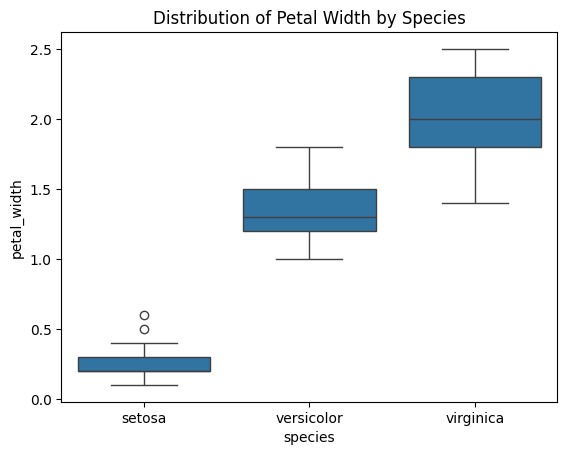

In [25]:
# Boxplot for each feature by species
plt.figure(figsize=(16, 10))
sns.boxplot(data=df_cleaned, x='species', y='sepal_length')
plt.title('Distribution of Sepal Length by Species')
plt.show()

sns.boxplot(data=df_cleaned, x='species', y='sepal_width')
plt.title('Distribution of Sepal Width by Species')
plt.show()

sns.boxplot(data=df_cleaned, x='species', y='petal_length')
plt.title('Distribution of Petal Length by Species')
plt.show()

sns.boxplot(data=df_cleaned, x='species', y='petal_width')
plt.title('Distribution of Petal Width by Species')
plt.show()

**Insight:**
- Iris setosa memiliki lebar petal yang paling kecil dibandingkan spesies lainnya.
- Versicolor dan virginica memiliki lebih banyak kesamaan dalam panjang petal.

### Pertanyaan 2: Apakah spesies Iris dapat dibedakan secara visual berdasarkan panjang dan lebar petal?

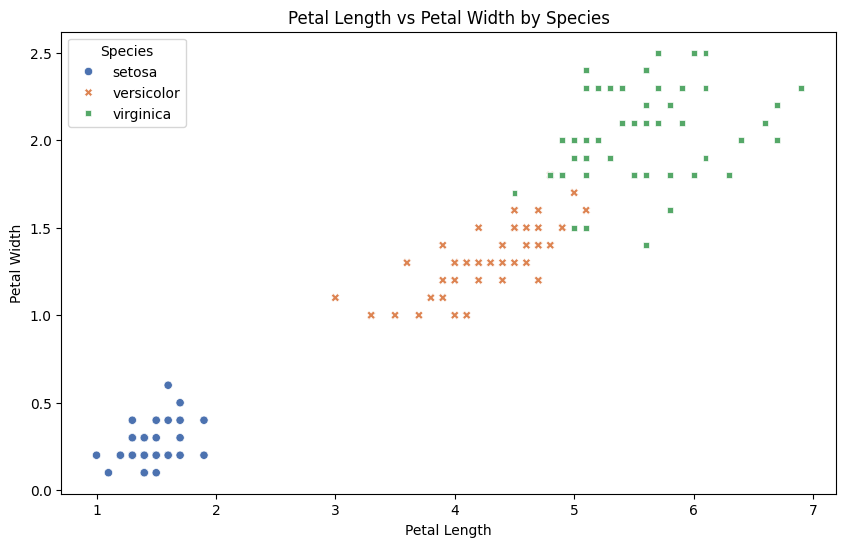

In [15]:
# Scatterplot for petal length and petal width
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='petal_length', y='petal_width', hue='species', style='species', palette='deep')
plt.title('Petal Length vs Petal Width by Species')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(title='Species')
plt.show()

**Insight:**
- Iris setosa dapat dibedakan dengan sangat jelas dari spesies lainnya berdasarkan petal.
- Ada tumpang tindih antara versicolor dan virginica, namun secara umum dapat dipisahkan.

## Analisis Lanjutan

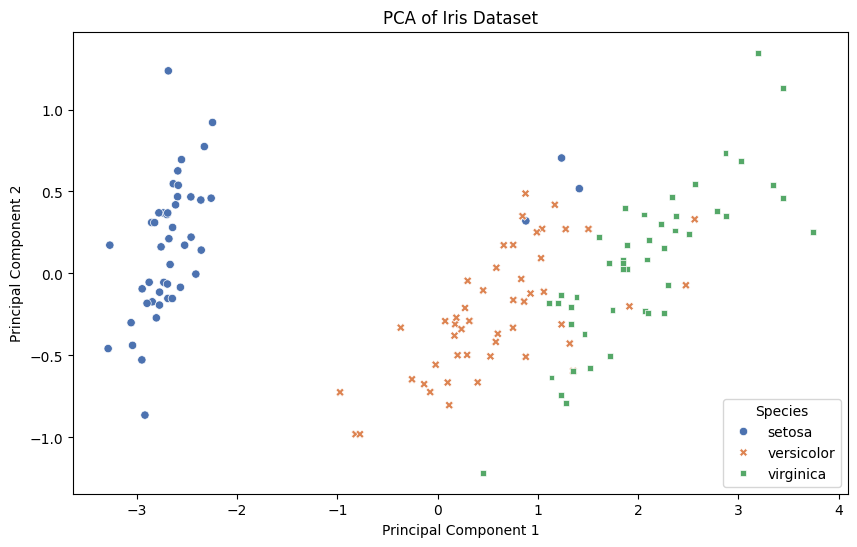

In [26]:
from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_cleaned.iloc[:, :-1])

df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['species'] = df_cleaned['species']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', style='species', palette='deep')
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

## Conclusion

1. Conclution pertanyaan 1 :
- Setiap spesies memiliki distribusi yang berbeda untuk panjang dan lebar petal serta sepal.
- Iris setosa memiliki karakteristik unik yang memisahkannya dari spesies lainnya.
2. Conclution pertanyaan 2 :
- Iris setosa dapat dibedakan dengan jelas menggunakan panjang dan lebar petal.
- Versicolor dan virginica memiliki beberapa tumpang tindih tetapi masih dapat dipisahkan secara visual.